# Time Complexity of Apriori vs. Brute-Force
NTU MSIS\
IN6227-2024-Assignment-2\
Ashiq Kareem\
G2405747J

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Creating datasets

A total of 8 datasets with different sizes (4 from Titanic and 4 from Restaurants) to measure time complexity of association rule mining algorithms vs brute forcing approaches.

### Titanic dataset

#### Importing Titanic dataset from Kaggle

https://www.kaggle.com/datasets/fteodoro/titanicapriori

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/raw_datasets/titanic_analysis.csv', delimiter=';')

# Create transactions per row by grouping everything together
titanic = df.apply(lambda row: [row['Sex'], row['Age'], row['Survived']], axis=1)
titanic = pd.DataFrame({'statistics': titanic})
titanic.to_csv('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/preprocessed_titanic_analysis.csv')

#### Creating 4 Titanic datasets varying in size

Small - 1000 rows\
Medium - 10,000 rows\
Large - 100,000 rows\
X-Large - 1,000,000 rows

In [6]:
# Create small Titanic dataset
titanic_small = titanic.sample(n=1000, random_state=1)
titanic_small.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_small.pkl')

# Create medium Titanic dataset
titanic_medium_repeat = 10000 // len(titanic) + 1
titanic_medium = pd.concat([titanic] * titanic_medium_repeat, ignore_index=True)
titanic_medium = titanic_medium[:10000]
titanic_medium.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_medium.pkl')

# # Create large Titanic dataset
titanic_large_repeat = 100000 // len(titanic) + 1
titanic_large = pd.concat([titanic] * titanic_large_repeat, ignore_index=True)
titanic_large = titanic_large[:100000]
titanic_large.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_large.pkl')

# Create xtra large Titanic dataset
titanic_xlarge_repeat = 1000000 // len(titanic) + 1
titanic_xlarge = pd.concat([titanic] * titanic_xlarge_repeat, ignore_index=True)
titanic_xlarge = titanic_xlarge[:1000000]
titanic_xlarge.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_xlarge.pkl')

### Restaurants dataset

#### Importing New York Restaurant dataset from Github

https://github.com/rohanag/ADB-AssocRuleMining/blob/master/Dataset.csv

In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/raw_datasets/newyorkrestaurant_dataset.csv', on_bad_lines='skip')
df = df.reset_index()
df = df.drop(columns=['index'])
df.columns = ['Borough', 'Cuisine', 'Grade']

# Remove all whitespace from all string columns
df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

# Generate transaction data by combining columns
restaurants = df.apply(lambda row: [row['Borough'], row['Cuisine'], row['Grade']], axis=1)
restaurants = pd.DataFrame({'items': restaurants})
restaurants.to_csv('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/preprocessed_newyorkrestaurant_analysis.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-facb13c7b38d>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)


#### Creating 4 Restaurant datasets varying in size

Small - 1000 rows\
Medium - 10,000 rows\
Large - 100,000 rows\
X-Large - 1,000,000 rows

In [10]:
def get_unique_items(transactions):
  # Get unique items from all transactions
  unique_items = set()
  for transaction in transactions:
      unique_items.update(transaction)
  return unique_items

items = 0
restaurants_sample = restaurants.sample(n=1)

while items < 92:
  # Sample a single row from the restaurants Dataframe
  sampled_row = restaurants.sample(n=1)

  # Concatenate the existing Dataframe with the sampled row
  restaurants_sample = pd.concat([restaurants_sample, sampled_row], ignore_index=True)

  # Convert DataFrame to list of transactions
  transactions = [set(item_list) for item_list in restaurants_sample['items']]

  # Calculate unique items
  new_items = get_unique_items(transactions)

  if len(new_items) > items:
    items = len(new_items)
  else:
    restaurants_sample = restaurants_sample.drop(restaurants_sample.index[-1])

restaurants_sample.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_sample.pkl')

In [36]:
restaurants_sample = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_sample.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Create small restaurants dataset
restaurants_small = restaurants.sample(n=1000-83, random_state=1)
restaurants_small = pd.concat([restaurants_small, restaurants_sample], ignore_index=True)
restaurants_small.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_small.pkl')

# Create medium restaurants dataset
restaurants_medium_repeat = 10000 // len(restaurants) + 1
restaurants_medium = pd.concat([restaurants] * restaurants_medium_repeat, ignore_index=True)
restaurants_medium = restaurants_medium[:10000-83]
restaurants_medium = pd.concat([restaurants_medium, restaurants_sample], ignore_index=True)
restaurants_medium.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_medium.pkl')

# Create large restaurants dataset
restaurants_large_repeat = 10000 // len(restaurants) + 1
restaurants_large = pd.concat([restaurants] * restaurants_large_repeat, ignore_index=True)
restaurants_large = restaurants_large[:100000-83]
restaurants_large = pd.concat([restaurants_large, restaurants_sample], ignore_index=True)
restaurants_large.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_large.pkl')

# Create xlarge restaurants dataset
restaurants_xlarge_repeat = 10000 // len(restaurants) + 1
restaurants_xlarge = pd.concat([restaurants] * restaurants_xlarge_repeat, ignore_index=True)
restaurants_xlarge = restaurants_xlarge[:1000000-83]
restaurants_xlarge = pd.concat([restaurants_xlarge, restaurants_sample], ignore_index=True)
restaurants_xlarge.to_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_xlarge.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Association rule mining implementation

### Titanic dataset

#### Running Apriori algorithm on Small Titanic dataset

In [13]:
titanic_small = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_small.pkl')
titanic_small = titanic_small['statistics'].str.join('|').str.get_dummies()

In [14]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(titanic_small, min_support=min_support, use_colnames=True)
end_time = time.time()

titanic_small_frequent_itemsets_time = end_time - start_time
print(titanic_small_frequent_itemsets_time)

0.013360023498535156


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

titanic_small_high_confidence_rule_generation = end_time - start_time
print(titanic_small_high_confidence_rule_generation)

0.0056269168853759766


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on Medium Titanic dataset

In [16]:
titanic_medium = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_medium.pkl')
titanic_medium = titanic_medium['statistics'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(titanic_medium, min_support=min_support, use_colnames=True)
end_time = time.time()

titanic_medium_frequent_itemsets_time = end_time - start_time
print(titanic_medium_frequent_itemsets_time)

0.019095182418823242


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

titanic_medium_high_confidence_rule_generation = end_time - start_time
print(titanic_medium_high_confidence_rule_generation)

0.008437871932983398


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on Large Titanic dataset

In [19]:
titanic_large = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_large.pkl')
titanic_large = titanic_large['statistics'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(titanic_large, min_support=min_support, use_colnames=True)
end_time = time.time()

titanic_large_frequent_itemsets_time = end_time - start_time
print(titanic_large_frequent_itemsets_time)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.26012325286865234


In [21]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

titanic_large_high_confidence_rule_generation = end_time - start_time
print(titanic_large_high_confidence_rule_generation)

0.009075164794921875


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on X-Large Titanic dataset

In [22]:
titanic_xlarge = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_xlarge.pkl')
titanic_xlarge = titanic_xlarge['statistics'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(titanic_xlarge, min_support=min_support, use_colnames=True)
end_time = time.time()

titanic_xlarge_frequent_itemsets_time = end_time - start_time
print(titanic_xlarge_frequent_itemsets_time)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.7634987831115723


In [24]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

titanic_xlarge_high_confidence_rule_generation = end_time - start_time
print(titanic_xlarge_high_confidence_rule_generation)

0.00548100471496582


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Restaurant dataset

#### Running Apriori algorithm on Small Restaurant dataset

In [38]:
restaurants_small = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_small.pkl')
restaurants_small = restaurants_small['items'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(restaurants_small, min_support=min_support, use_colnames=True)
end_time = time.time()

restaurants_small_frequent_itemsets_time = end_time - start_time
print(restaurants_small_frequent_itemsets_time)

0.009494781494140625


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

restaurants_small_high_confidence_rule_generation = end_time - start_time
print(restaurants_small_high_confidence_rule_generation)

0.0040683746337890625


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on Medium Restaurant dataset

In [41]:
restaurants_medium = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_medium.pkl')
restaurants_medium = restaurants_medium['items'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(restaurants_medium, min_support=min_support, use_colnames=True)
end_time = time.time()

restaurants_medium_frequent_itemsets_time = end_time - start_time
print(restaurants_medium_frequent_itemsets_time)

0.01646733283996582


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

restaurants_medium_high_confidence_rule_generation = end_time - start_time
print(restaurants_medium_high_confidence_rule_generation)

0.001999378204345703


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on Large Restaurant dataset

In [44]:
restaurants_large = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_large.pkl')
restaurants_large = restaurants_large['items'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(restaurants_large, min_support=min_support, use_colnames=True)
end_time = time.time()

restaurants_large_frequent_itemsets_time = end_time - start_time
print(restaurants_large_frequent_itemsets_time)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.35901570320129395


In [46]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

restaurants_large_high_confidence_rule_generation = end_time - start_time
print(restaurants_large_high_confidence_rule_generation)

0.002599000930786133


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Running Apriori algorithm on X-Large Restaurant dataset

In [50]:
restaurants_xlarge = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_xlarge.pkl')
restaurants_xlarge = restaurants_xlarge['items'].str.join('|').str.get_dummies()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori

min_support = 0.1

start_time = time.time()
frequent_itemsets = apriori(restaurants_xlarge, min_support=min_support, use_colnames=True)
end_time = time.time()

restaurants_xlarge_frequent_itemsets_time = end_time - start_time
print(restaurants_xlarge_frequent_itemsets_time)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.8390617370605469


In [52]:
from mlxtend.frequent_patterns import association_rules

min_confidence = 0.7
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
end_time = time.time()

titanic_xlarge_high_confidence_rule_generation = end_time - start_time
print(titanic_xlarge_high_confidence_rule_generation)

0.0027778148651123047


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Brute-force implementation

### Titanic dataset

#### Measuring time taken for Small Titanic dataset

In [80]:
# Import small Titanic dataset
titanic_small = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_small.pkl')

# Convert DataFrame to list of transactions
transactions = [set(item_list) for item_list in titanic_small['statistics']]

# Run Brute-Forcing code
import time
from itertools import combinations

def get_unique_items(transactions):
    # Get unique items from all transactions
    unique_items = set()
    for transaction in transactions:
        unique_items.update(transaction)
    return unique_items

def generate_all_combinations(items):
    # Generate all non-empty combinations of items
    all_combinations = []
    for i in range(1, len(items) + 1):
        all_combinations.extend(combinations(items, i))
    return all_combinations

def calculate_support(itemset, transactions):
    # Calculate support as the proportion of transactions that contain the itemset
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_subsets(itemset):
    # Generate all non-empty subsets of an itemset
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def brute_force_association_rules(transactions, min_support, min_confidence):
    # Measure time taken for frequent itemset generation
    start_time = time.time()

    # Step 1: Get all unique items from the transactions
    items = get_unique_items(transactions)
    print('Unique items:', len(items))

    # Step 2: Generate all possible itemsets
    all_itemsets = generate_all_combinations(items)

    # Step 3: Calculate support for each itemset
    itemset_support = {}
    for itemset in all_itemsets:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            itemset_support[itemset] = support

    # Calculate time taken for frequent itemset generation
    end_time = time.time()
    frequent_itemsets_time_brute_force = end_time - start_time
    print('Frequent itemsets:', frequent_itemsets_time_brute_force)

    # Step 4: Generate association rules from itemsets with sufficient support
    start_time = time.time()
    association_rules = []
    for itemset, support in itemset_support.items():
        subsets = generate_subsets(itemset)
        for subset in subsets:
            antecedent = subset
            consequent = tuple(set(itemset) - set(antecedent))
            if consequent:
                # Calculate confidence
                antecedent_support = calculate_support(antecedent, transactions)
                confidence = support / antecedent_support if antecedent_support > 0 else 0
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence
                    }
                    association_rules.append(rule)

    end_time = time.time()
    rule_generation_time_brute_force = end_time - start_time
    print('Rule generation:', rule_generation_time_brute_force)

    return association_rules


min_support = 0.1
min_confidence = 0.7
rules = brute_force_association_rules(transactions, min_support, min_confidence)

for rule in rules:
    print(f"Rule: {rule['antecedent']} -> {rule['consequent']}, "
          f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

Unique items: 6
Frequent itemsets: 0.014304161071777344
Rule generation: 0.007605075836181641
Rule: ('Male',) -> ('Adult',), Support: 0.76, Confidence: 0.97
Rule: ('Adult',) -> ('Male',), Support: 0.76, Confidence: 0.80
Rule: ('Male',) -> ('No',), Support: 0.62, Confidence: 0.79
Rule: ('No',) -> ('Male',), Support: 0.62, Confidence: 0.91
Rule: ('Yes',) -> ('Adult',), Support: 0.29, Confidence: 0.92
Rule: ('Female',) -> ('Yes',), Support: 0.15, Confidence: 0.72
Rule: ('No',) -> ('Adult',), Support: 0.66, Confidence: 0.97
Rule: ('Female',) -> ('Adult',), Support: 0.19, Confidence: 0.91
Rule: ('Male', 'Yes') -> ('Adult',), Support: 0.15, Confidence: 0.91
Rule: ('Male',) -> ('Adult', 'No'), Support: 0.61, Confidence: 0.78
Rule: ('No',) -> ('Adult', 'Male'), Support: 0.61, Confidence: 0.89
Rule: ('Male', 'Adult') -> ('No',), Support: 0.61, Confidence: 0.80
Rule: ('Male', 'No') -> ('Adult',), Support: 0.61, Confidence: 0.98
Rule: ('Adult', 'No') -> ('Male',), Support: 0.61, Confidence: 0.92


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Measuring time taken for Medium Titanic dataset

In [79]:
# Import Medium Titanic dataset
titanic_medium = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_medium.pkl')

# Convert DataFrame to list of transactions
transactions = [set(item_list) for item_list in titanic_medium['statistics']]

# Run Brute-Forcing code
import time
from itertools import combinations

def get_unique_items(transactions):
    # Get unique items from all transactions
    unique_items = set()
    for transaction in transactions:
        unique_items.update(transaction)
    return unique_items

def generate_all_combinations(items):
    # Generate all non-empty combinations of items
    all_combinations = []
    for i in range(1, len(items) + 1):
        all_combinations.extend(combinations(items, i))
    return all_combinations

def calculate_support(itemset, transactions):
    # Calculate support as the proportion of transactions that contain the itemset
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_subsets(itemset):
    # Generate all non-empty subsets of an itemset
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def brute_force_association_rules(transactions, min_support, min_confidence):
    # Measure time taken for frequent itemset generation
    start_time = time.time()

    # Step 1: Get all unique items from the transactions
    items = get_unique_items(transactions)
    print('Unique items:', len(items))

    # Step 2: Generate all possible itemsets
    all_itemsets = generate_all_combinations(items)

    # Step 3: Calculate support for each itemset
    itemset_support = {}
    for itemset in all_itemsets:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            itemset_support[itemset] = support

    # Calculate time taken for frequent itemset generation
    end_time = time.time()
    frequent_itemsets_time_brute_force = end_time - start_time
    print('Frequent itemsets:', frequent_itemsets_time_brute_force)

    # Step 4: Generate association rules from itemsets with sufficient support
    start_time = time.time()
    association_rules = []
    for itemset, support in itemset_support.items():
        subsets = generate_subsets(itemset)
        for subset in subsets:
            antecedent = subset
            consequent = tuple(set(itemset) - set(antecedent))
            if consequent:
                # Calculate confidence
                antecedent_support = calculate_support(antecedent, transactions)
                confidence = support / antecedent_support if antecedent_support > 0 else 0
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence
                    }
                    association_rules.append(rule)

    end_time = time.time()
    rule_generation_time_brute_force = end_time - start_time
    print('Rule generation:', rule_generation_time_brute_force)

    return association_rules


min_support = 0.1
min_confidence = 0.7
rules = brute_force_association_rules(transactions, min_support, min_confidence)

for rule in rules:
    print(f"Rule: {rule['antecedent']} -> {rule['consequent']}, "
          f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique items: 6
Frequent itemsets: 0.3214538097381592
Rule generation: 0.1267397403717041
Rule: ('Male',) -> ('Adult',), Support: 0.78, Confidence: 0.96
Rule: ('Adult',) -> ('Male',), Support: 0.78, Confidence: 0.82
Rule: ('Male',) -> ('No',), Support: 0.66, Confidence: 0.82
Rule: ('No',) -> ('Male',), Support: 0.66, Confidence: 0.93
Rule: ('Yes',) -> ('Adult',), Support: 0.26, Confidence: 0.92
Rule: ('Female',) -> ('Yes',), Support: 0.14, Confidence: 0.73
Rule: ('Adult',) -> ('No',), Support: 0.69, Confidence: 0.72
Rule: ('No',) -> ('Adult',), Support: 0.69, Confidence: 0.96
Rule: ('Female',) -> ('Adult',), Support: 0.17, Confidence: 0.90
Rule: ('Male', 'Yes') -> ('Adult',), Support: 0.14, Confidence: 0.92
Rule: ('Male',) -> ('Adult', 'No'), Support: 0.65, Confidence: 0.80
Rule: ('No',) -> ('Adult', 'Male'), Support: 0.65, Confidence: 0.90
Rule: ('Male', 'Adult') -> ('No',), Support: 0.65, Confidence: 0.83
Rule: ('Male', 'No') -> ('Adult',), Support: 0.65, Confidence: 0.97
Rule: ('Adu

#### Measuring time taken for Large Titanic dataset

In [78]:
# Import Large Titanic dataset
titanic_large = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_large.pkl')

# Convert DataFrame to list of transactions
transactions = [set(item_list) for item_list in titanic_large['statistics']]

# Run Brute-Forcing code
import time
from itertools import combinations

def get_unique_items(transactions):
    # Get unique items from all transactions
    unique_items = set()
    for transaction in transactions:
        unique_items.update(transaction)
    return unique_items

def generate_all_combinations(items):
    # Generate all non-empty combinations of items
    all_combinations = []
    for i in range(1, len(items) + 1):
        all_combinations.extend(combinations(items, i))
    return all_combinations

def calculate_support(itemset, transactions):
    # Calculate support as the proportion of transactions that contain the itemset
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_subsets(itemset):
    # Generate all non-empty subsets of an itemset
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def brute_force_association_rules(transactions, min_support, min_confidence):
    # Measure time taken for frequent itemset generation
    start_time = time.time()

    # Step 1: Get all unique items from the transactions
    items = get_unique_items(transactions)
    print('Unique items:', len(items))

    # Step 2: Generate all possible itemsets
    all_itemsets = generate_all_combinations(items)

    # Step 3: Calculate support for each itemset
    itemset_support = {}
    for itemset in all_itemsets:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            itemset_support[itemset] = support

    # Calculate time taken for frequent itemset generation
    end_time = time.time()
    frequent_itemsets_time_brute_force = end_time - start_time
    print('Frequent itemsets:', frequent_itemsets_time_brute_force)

    # Step 4: Generate association rules from itemsets with sufficient support
    start_time = time.time()
    association_rules = []
    for itemset, support in itemset_support.items():
        subsets = generate_subsets(itemset)
        for subset in subsets:
            antecedent = subset
            consequent = tuple(set(itemset) - set(antecedent))
            if consequent:
                # Calculate confidence
                antecedent_support = calculate_support(antecedent, transactions)
                confidence = support / antecedent_support if antecedent_support > 0 else 0
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence
                    }
                    association_rules.append(rule)

    end_time = time.time()
    rule_generation_time_brute_force = end_time - start_time
    print('Rule generation:', rule_generation_time_brute_force)

    return association_rules


min_support = 0.1
min_confidence = 0.7
rules = brute_force_association_rules(transactions, min_support, min_confidence)

for rule in rules:
    print(f"Rule: {rule['antecedent']} -> {rule['consequent']}, "
          f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique items: 6
Frequent itemsets: 2.0676398277282715
Rule generation: 0.714909553527832
Rule: ('Male',) -> ('Adult',), Support: 0.76, Confidence: 0.96
Rule: ('Adult',) -> ('Male',), Support: 0.76, Confidence: 0.80
Rule: ('Male',) -> ('No',), Support: 0.62, Confidence: 0.79
Rule: ('No',) -> ('Male',), Support: 0.62, Confidence: 0.92
Rule: ('Yes',) -> ('Adult',), Support: 0.29, Confidence: 0.92
Rule: ('Female',) -> ('Yes',), Support: 0.15, Confidence: 0.73
Rule: ('No',) -> ('Adult',), Support: 0.66, Confidence: 0.96
Rule: ('Female',) -> ('Adult',), Support: 0.19, Confidence: 0.90
Rule: ('Male', 'Yes') -> ('Adult',), Support: 0.15, Confidence: 0.92
Rule: ('Male',) -> ('Adult', 'No'), Support: 0.61, Confidence: 0.77
Rule: ('No',) -> ('Adult', 'Male'), Support: 0.61, Confidence: 0.89
Rule: ('Male', 'Adult') -> ('No',), Support: 0.61, Confidence: 0.80
Rule: ('Male', 'No') -> ('Adult',), Support: 0.61, Confidence: 0.97
Rule: ('Adult', 'No') -> ('Male',), Support: 0.61, Confidence: 0.93
Rule:

#### Measuring time taken for X-Large Titanic dataset

In [77]:
# Import X-Large Titanic dataset
titanic_xlarge = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/titanic_xlarge.pkl')

# Convert DataFrame to list of transactions
transactions = [set(item_list) for item_list in titanic_xlarge['statistics']]

# Run Brute-Forcing code
import time
from itertools import combinations

def get_unique_items(transactions):
    # Get unique items from all transactions
    unique_items = set()
    for transaction in transactions:
        unique_items.update(transaction)
    return unique_items

def generate_all_combinations(items):
    # Generate all non-empty combinations of items
    all_combinations = []
    for i in range(1, len(items) + 1):
        all_combinations.extend(combinations(items, i))
    return all_combinations

def calculate_support(itemset, transactions):
    # Calculate support as the proportion of transactions that contain the itemset
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_subsets(itemset):
    # Generate all non-empty subsets of an itemset
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def brute_force_association_rules(transactions, min_support, min_confidence):
    # Measure time taken for frequent itemset generation
    start_time = time.time()

    # Step 1: Get all unique items from the transactions
    items = get_unique_items(transactions)
    print('Unique items:', len(items))

    # Step 2: Generate all possible itemsets
    all_itemsets = generate_all_combinations(items)

    # Step 3: Calculate support for each itemset
    itemset_support = {}
    for itemset in all_itemsets:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            itemset_support[itemset] = support

    # Calculate time taken for frequent itemset generation
    end_time = time.time()
    frequent_itemsets_time_brute_force = end_time - start_time
    print('Frequent itemsets:', frequent_itemsets_time_brute_force)

    # Step 4: Generate association rules from itemsets with sufficient support
    start_time = time.time()
    association_rules = []
    for itemset, support in itemset_support.items():
        subsets = generate_subsets(itemset)
        for subset in subsets:
            antecedent = subset
            consequent = tuple(set(itemset) - set(antecedent))
            if consequent:
                # Calculate confidence
                antecedent_support = calculate_support(antecedent, transactions)
                confidence = support / antecedent_support if antecedent_support > 0 else 0
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence
                    }
                    association_rules.append(rule)

    end_time = time.time()
    rule_generation_time_brute_force = end_time - start_time
    print('Rule generation:', rule_generation_time_brute_force)

    return association_rules


min_support = 0.1
min_confidence = 0.7
rules = brute_force_association_rules(transactions, min_support, min_confidence)

for rule in rules:
    print(f"Rule: {rule['antecedent']} -> {rule['consequent']}, "
          f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique items: 6
Frequent itemsets: 19.597121238708496
Rule generation: 7.021878719329834
Rule: ('Male',) -> ('Adult',), Support: 0.76, Confidence: 0.96
Rule: ('Adult',) -> ('Male',), Support: 0.76, Confidence: 0.80
Rule: ('Male',) -> ('No',), Support: 0.62, Confidence: 0.79
Rule: ('No',) -> ('Male',), Support: 0.62, Confidence: 0.92
Rule: ('Yes',) -> ('Adult',), Support: 0.30, Confidence: 0.92
Rule: ('Female',) -> ('Yes',), Support: 0.16, Confidence: 0.73
Rule: ('No',) -> ('Adult',), Support: 0.65, Confidence: 0.97
Rule: ('Female',) -> ('Adult',), Support: 0.19, Confidence: 0.90
Rule: ('Male', 'Yes') -> ('Adult',), Support: 0.15, Confidence: 0.92
Rule: ('Male',) -> ('Adult', 'No'), Support: 0.60, Confidence: 0.77
Rule: ('No',) -> ('Adult', 'Male'), Support: 0.60, Confidence: 0.89
Rule: ('Male', 'Adult') -> ('No',), Support: 0.60, Confidence: 0.80
Rule: ('Male', 'No') -> ('Adult',), Support: 0.60, Confidence: 0.97
Rule: ('Adult', 'No') -> ('Male',), Support: 0.60, Confidence: 0.92
Rule:

### Restaurant dataset

In [90]:
import pandas as pd

# Import Sample Restaurant dataset
restaurants_sample = pd.read_pickle('/content/drive/MyDrive/NTU MSIS/IN6227/Assignment 2/preprocessed_datasets/restaurants_sample.pkl')
restaurants_sample = restaurants_sample.sample(n=10, random_state=1)

# Convert DataFrame to list of transactions
transactions = [set(item_list) for item_list in restaurants_sample['items']]

# Run Brute-Forcing code
import time
from itertools import combinations

def get_unique_items(transactions):
    # Get unique items from all transactions
    unique_items = set()
    for transaction in transactions:
        unique_items.update(transaction)
    return unique_items

def generate_all_combinations(items):
    # Generate all non-empty combinations of items
    all_combinations = []
    for i in range(1, len(items) + 1):
        all_combinations.extend(combinations(items, i))
    return all_combinations

def calculate_support(itemset, transactions):
    # Calculate support as the proportion of transactions that contain the itemset
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_subsets(itemset):
    # Generate all non-empty subsets of an itemset
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def brute_force_association_rules(transactions, min_support, min_confidence):
    # Measure time taken for frequent itemset generation
    start_time = time.time()

    # Step 1: Get all unique items from the transactions
    items = get_unique_items(transactions)
    print('Unique items:', len(items))

    # Step 2: Generate all possible itemsets
    all_itemsets = generate_all_combinations(items)

    # Step 3: Calculate support for each itemset
    itemset_support = {}
    for itemset in all_itemsets:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            itemset_support[itemset] = support

    # Calculate time taken for frequent itemset generation
    end_time = time.time()
    frequent_itemsets_time_brute_force = end_time - start_time
    print('Frequent itemsets:', frequent_itemsets_time_brute_force)

    # Step 4: Generate association rules from itemsets with sufficient support
    start_time = time.time()
    association_rules = []
    for itemset, support in itemset_support.items():
        subsets = generate_subsets(itemset)
        for subset in subsets:
            antecedent = subset
            consequent = tuple(set(itemset) - set(antecedent))
            if consequent:
                # Calculate confidence
                antecedent_support = calculate_support(antecedent, transactions)
                confidence = support / antecedent_support if antecedent_support > 0 else 0
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence
                    }
                    association_rules.append(rule)

    end_time = time.time()
    rule_generation_time_brute_force = end_time - start_time
    print('Rule generation:', rule_generation_time_brute_force)

    return association_rules


min_support = 0.1
min_confidence = 0.7
rules = brute_force_association_rules(transactions, min_support, min_confidence)

for rule in rules:
    print(f"Rule: {rule['antecedent']} -> {rule['consequent']}, "
          f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique items: 16
Frequent itemsets: 0.2650737762451172
Rule generation: 0.0005588531494140625
Rule: ('Fruits/Vegetables',) -> ('MANHATTAN',), Support: 0.10, Confidence: 1.00
Rule: ('Fruits/Vegetables',) -> ('A',), Support: 0.10, Confidence: 1.00
Rule: ('C',) -> ('EasternEuropean',), Support: 0.10, Confidence: 1.00
Rule: ('EasternEuropean',) -> ('C',), Support: 0.10, Confidence: 1.00
Rule: ('C',) -> ('BROOKLYN',), Support: 0.10, Confidence: 1.00
Rule: ('BROOKLYN',) -> ('C',), Support: 0.10, Confidence: 1.00
Rule: ('Sandwiches/Salads/MixedBuffet',) -> ('MANHATTAN',), Support: 0.10, Confidence: 1.00
Rule: ('Sandwiches/Salads/MixedBuffet',) -> ('A',), Support: 0.10, Confidence: 1.00
Rule: ('Afghan',) -> ('MANHATTAN',), Support: 0.10, Confidence: 1.00
Rule: ('Afghan',) -> ('A',), Support: 0.10, Confidence: 1.00
Rule: ('Z',) -> ('MANHATTAN',), Support: 0.10, Confidence: 1.00
Rule: ('Z',) -> ('Tex-Mex',), Support: 0.10, Confidence: 1.00
Rule: ('Tex-Mex',) -> ('Z',), Support: 0.10, Confidence:

#### Calculating time taken for all Restaurant datasets

The time complexity of the brute-forcing implementation will be O(n * 2^m) where n is the number of transactions and m is the number of unique items within the dataset.


---


These are the metrics recorded for a dataset of 10 rows:\
Unique items: 16\
Frequent itemsets: 0.2650737762451172\
Rule generation: 0.0005588531494140625\
O(10 * 2^16) = 0.2650737762451172
O(10 * 2^16) = 0.0005588531494140625

---
Since there are 92 unique items in the dataset being used, we can derive the time it takes to run 10 rows where the unique items = 92. As such, the ratio is 2^92/2^16 = 2^76. With this, we can estimate the time it takes for 10 rows with 92 unique items:\
10 * 2^16 * 2^76\
= 0.2650737762451172 * 2^76

In [101]:
frequent_itemsets_brute_force = 0.2650737762451172 * 2**76
rule_generation_brute_force = 0.0005588531494140625 * 2**76
brute_force_sizes = [100, 1000, 10000, 100000]
frequent_itemsets_brute_force_values = []
rule_generation_brute_force_values = []

for size in brute_force_sizes:
  frequent_itemsets_brute_force_values.append(frequent_itemsets_brute_force * size)
  rule_generation_brute_force_values.append(rule_generation_brute_force * size)

print('Frequent itemsets:', frequent_itemsets_brute_force_values)
print('Rule generation:', rule_generation_brute_force_values)

Frequent itemsets: [2.002840826284207e+24, 2.002840826284207e+25, 2.002840826284207e+26, 2.002840826284207e+27]
Rule generation: [4.222575010622577e+21, 4.222575010622577e+22, 4.222575010622577e+23, 4.222575010622577e+24]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Plotting Graphs

In [126]:
# Set the default font size for all elements
plt.rcParams.update({'font.size': 6})  # Set font size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Titanic dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


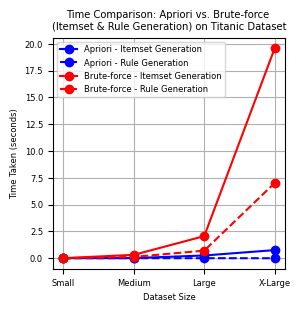

In [133]:
import matplotlib.pyplot as plt

# Updated sample data with X-Large size
dataset_sizes = ['Small', 'Medium', 'Large', 'X-Large']
apriori_itemset_times = [0.013360023498535156, 0.019095182418823242, 0.26012325286865234, 0.7634987831115723]
apriori_rule_times = [0.0056269168853759766, 0.008437871932983398, 0.009075164794921875, 0.00548100471496582]
bruteforce_itemset_times = [0.014304161071777344, 0.3214538097381592, 2.0676398277282715, 19.597121238708496]
bruteforce_rule_times = [0.007605075836181641, 0.1267397403717041, 0.714909553527832, 7.021878719329834]

# Plotting
plt.figure(figsize=(3, 3))

# Apriori times
plt.plot(dataset_sizes, apriori_itemset_times, marker='o', color='b', linestyle='-', label='Apriori - Itemset Generation')
plt.plot(dataset_sizes, apriori_rule_times, marker='o', color='b', linestyle='--', label='Apriori - Rule Generation')

# Brute-force times
plt.plot(dataset_sizes, bruteforce_itemset_times, marker='o', color='r', linestyle='-', label='Brute-force - Itemset Generation')
plt.plot(dataset_sizes, bruteforce_rule_times, marker='o', color='r', linestyle='--', label='Brute-force - Rule Generation')

# Adding labels and title
plt.xlabel("Dataset Size")
plt.ylabel("Time Taken (seconds)")
plt.title("Time Comparison: Apriori vs. Brute-force \n(Itemset & Rule Generation) on Titanic Dataset")
plt.legend()
plt.grid(True)
plt.show()

### Restaurants dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


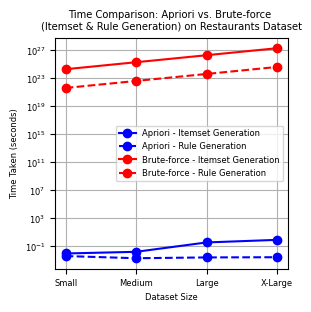

In [135]:
import matplotlib.pyplot as plt

# Inputting times
dataset_sizes = ['Small', 'Medium', 'Large', 'X-Large']
apriori_itemset_times = [0.009494781494140625, 0.01646733283996582, 0.35901570320129395, 0.8390617370605469]
apriori_rule_times = [0.0040683746337890625, 0.001999378204345703, 0.002599000930786133, 0.0027778148651123047]
bruteforce_itemset_times = [2.002840826284207e+24, 2.002840826284207e+25, 2.002840826284207e+26, 2.002840826284207e+27]
bruteforce_rule_times = [4.222575010622577e+21, 4.222575010622577e+22, 4.222575010622577e+23, 4.222575010622577e+24]

# Plotting
plt.figure(figsize=(3, 3))

# Apriori times
plt.plot(dataset_sizes, apriori_itemset_times, marker='o', color='b', linestyle='-', label='Apriori - Itemset Generation')
plt.plot(dataset_sizes, apriori_rule_times, marker='o', color='b', linestyle='--', label='Apriori - Rule Generation')

# Brute-force times
plt.plot(dataset_sizes, bruteforce_itemset_times, marker='o', color='r', linestyle='-', label='Brute-force - Itemset Generation')
plt.plot(dataset_sizes, bruteforce_rule_times, marker='o', color='r', linestyle='--', label='Brute-force - Rule Generation')

# Adding labels and title
plt.xlabel("Dataset Size")
plt.ylabel("Time Taken (seconds)")
plt.title("Time Comparison: Apriori vs. Brute-force \n(Itemset & Rule Generation) on Restaurants Dataset")
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.grid(True)
plt.show()